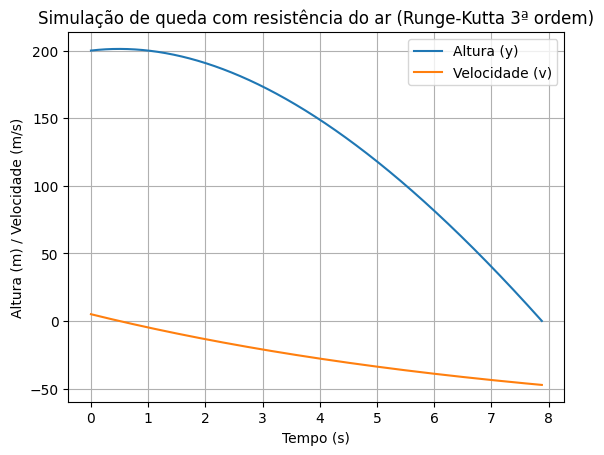

Altura Máxima: 201.22m
Tempo até Altura Máxima: 0.49s
Tempo até queda: 7.88s
Velocidade de Impacto: -47.31m/s


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os parâmetros
g = 9.81      # Aceleração gravitacional (m/s^2)
k = 0.25      # Coeficiente de resistência do ar (kg/s)
m = 2.0       # Massa do objeto (kg)
v0 = 5.0      # Velocidade inicial (m/s)
y0 = 200.0    # Altura inicial (m)
t0 = 0.0      # Tempo inicial (s)
tf = 20.0     # Tempo final (s) para simulação completa

# Funções que representam as EDOs do problema
def dvdt(v):
    return -g - (k/m) * v

def dydt(v):
    return v

# Método de Runge-Kutta de terceira ordem
def runge_kutta_3rd_order(v0, y0, t0, tf, dt):
    t_values = [t0]
    v_values = [v0]
    y_values = [y0]

    t = t0
    v = v0
    y = y0

    while t < tf and y > 0:
        # Passo 1: Calcula F'
        F1v = dvdt(v)
        F1y = dydt(v)

        # Passo 2: Estima os valores intermediários
        v_half = v + 0.5 * dt * F1v
        y_half = y + 0.5 * dt * F1y

        F2v = dvdt(v_half)
        F2y = dydt(v_half)

        # Passo 3: Calcula F"
        v_next = v + dt * F2v
        y_next = y + dt * F2y

        F3v = dvdt(v_next)
        F3y = dydt(v_next)

        # Atualização dos valores de v e y
        v = v + (dt / 6) * (F1v + 4 * F2v + F3v)
        y = y + (dt / 6) * (F1y + 4 * F2y + F3y)

        t += dt
        t_values.append(t)
        v_values.append(v)
        y_values.append(y)

    return np.array(t_values), np.array(v_values), np.array(y_values)

# Definir os valores de dt da tabela 1
dt_values = [0.1, 0.01, 0.001, 0.0001]

# Rodar o método para os diferentes valores de dt
results = {}
for dt in dt_values:
    t_vals, v_vals, y_vals = runge_kutta_3rd_order(v0, y0, t0, tf, dt)
    results[dt] = (t_vals, v_vals, y_vals)

# Plotar a solução aproximada para o menor valor de dt
t_min, v_min, y_min = results[0.0001]
plt.plot(t_min, y_min, label='Altura (y)')
plt.plot(t_min, v_min, label='Velocidade (v)')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (m) / Velocidade (m/s)')
plt.title('Simulação de queda com resistência do ar (Runge-Kutta 3ª ordem)')
plt.legend()
plt.grid(True)
plt.show()

# Retornando os resultados principais (tmax, ymax, t_total, v_impacto)
t_total = t_min[-1]
y_max = np.max(y_min)
t_max = t_min[np.argmax(y_min)]
v_impacto = v_min[-1]

#(t_max, y_max, t_total, v_impacto)

print(f"Altura Máxima: {np.round(y_max, 2)}m\nTempo até Altura Máxima: {np.round(t_max, 2)}s\nTempo até queda: {np.round(t_total, 2)}s\nVelocidade de Impacto: {np.round(v_impacto, 2)}m/s")
